In [121]:
from sklearn.datasets import load_breast_cancer

## 1. Загрузить из наборов данных Scikit-learn набор breast cancer wisconsin [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) размерностью 30

In [122]:
dataset = load_breast_cancer()

## 2. Загрузить в отдельные переменные входные и выходные данные (data, target)

In [123]:
data_target=dataset.target
data=dataset.data
title_colms=dataset.feature_names


## 3. Реализовать метод главных компонент в функции, принимающей 2 аргумента: входные данные и искомое число главных компонент N

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

### 1. Нормализовать данные, вычитая для каждого значения в колонке среднее значения этой колонки (X.mean())

In [125]:
print(data)
data_normal=data-data.mean(axis=0)
data_normal

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


array([[ 3.86270826e+00, -8.90964851e+00,  3.08309666e+01, ...,
         1.50793777e-01,  1.70024429e-01,  3.49541828e-02],
       [ 6.44270826e+00, -1.51964851e+00,  4.09309666e+01, ...,
         7.13937768e-02, -1.50755712e-02,  5.07418278e-03],
       [ 5.56270826e+00,  1.96035149e+00,  3.80309666e+01, ...,
         1.28393777e-01,  7.12244288e-02,  3.63418278e-03],
       ...,
       [ 2.47270826e+00,  8.79035149e+00,  1.63309666e+01, ...,
         2.71937768e-02, -6.82755712e-02, -5.74581722e-03],
       [ 6.47270826e+00,  1.00403515e+01,  4.81309666e+01, ...,
         1.50393777e-01,  1.18624429e-01,  4.00541828e-02],
       [-6.36729174e+00,  5.25035149e+00, -4.40490334e+01, ...,
        -1.14606223e-01, -2.97557118e-03, -1.35558172e-02]])

### 2.Построить матрицу ковариации, используя метод NumPy cov()

In [126]:
cov_matrix=np.cov(data_normal,rowvar=False)
cov_matrix

array([[ 1.24189201e+01,  4.90758156e+00,  8.54471417e+01,
         1.22448341e+03,  8.45445983e-03,  9.41970568e-02,
         1.90127582e-01,  1.12475116e-01,  1.42731729e-02,
        -7.75370629e-03,  6.63650325e-01, -1.89188600e-01,
         4.80354973e+00,  1.17968162e+02, -2.35533633e-03,
         1.30005142e-02,  2.06588280e-02,  8.17956306e-03,
        -3.03898170e-03, -3.97624858e-04,  1.65137495e+01,
         6.43310002e+00,  1.14288570e+02,  1.88822722e+03,
         9.62462515e-03,  2.29249204e-01,  3.87386440e-01,
         1.72392739e-01,  3.57457580e-02,  4.49735060e-04],
       [ 4.90758156e+00,  1.84989087e+01,  3.44397592e+01,
         4.85993787e+02, -1.41477877e-03,  5.37668058e-02,
         1.03692344e-01,  4.89769268e-02,  8.41887566e-03,
        -2.32115824e-03,  3.29037393e-01,  9.16695072e-01,
         2.44944877e+00,  5.08408652e+01,  8.54099045e-05,
         1.47865987e-02,  1.86039300e-02,  4.34837964e-03,
         3.24506954e-04,  6.19772637e-04,  7.32926700e+

### 3. Диагонализировать матрицу методом NumPy linalg.eig()

In [127]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

### 4. Отсортировать векторы, используя встроенный метод argsort()

In [128]:
sorted_indexes = np.argsort(-eigenvalues)
sorted_eigenvectors = eigenvectors[:, sorted_indexes]


### 5. Используя синтаксис слайсинга, оставить N главных компонент

In [129]:
selected_eigenvectors = sorted_eigenvectors[:, :3]#N


### 6. Используя метод dot(), модифицировать исходные нормализованные данные

In [130]:
new_data = np.dot(data_normal, selected_eigenvectors)


### 7. Вернуть данные сниженной размерности

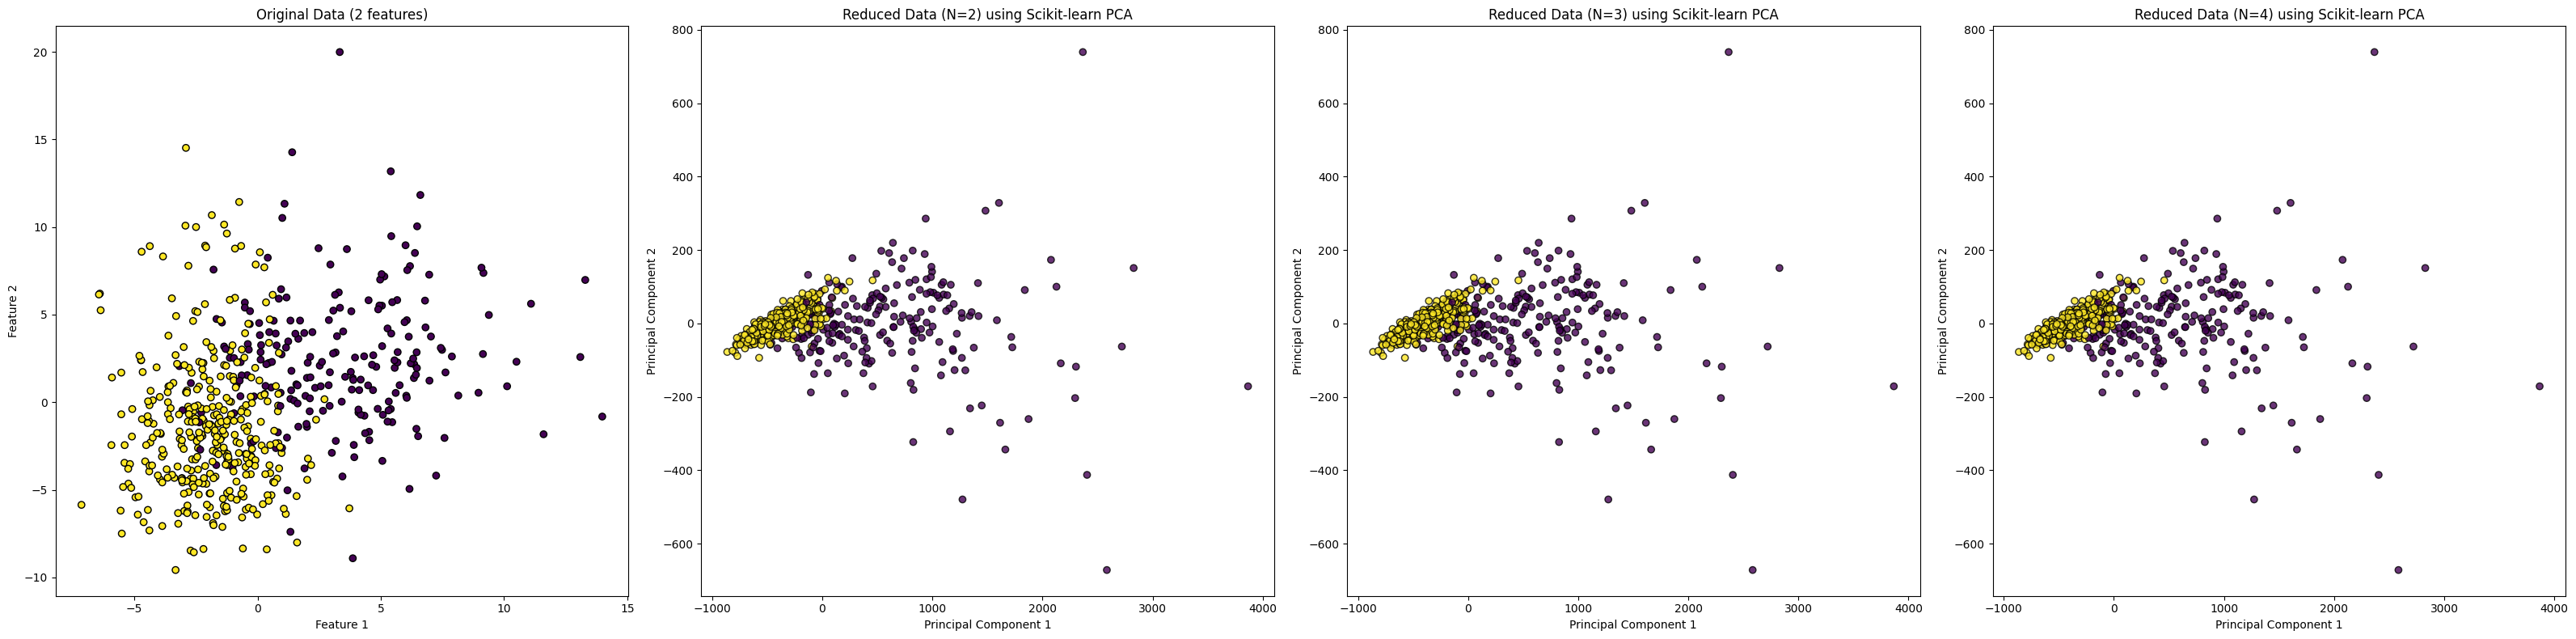

In [131]:
def pca_custom(data, N):
    data_normal=data-data.mean(axis=0)
    cov_matrix=np.cov(data_normal,rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    
    sorted_indexes = np.argsort(-eigenvalues)
    sorted_eigenvectors = eigenvectors[:, sorted_indexes]
    selected_eigenvectors = sorted_eigenvectors[:, :N]
    new_data = np.dot(data_normal, selected_eigenvectors)
    
    return new_data

reduced_data = pca_custom(data_normal,2)
plt.figure(figsize=(32, 8))

# Исходные данные
plt.subplot(141)
plt.scatter(data_normal[:, 0], data_normal[:, 1], c=data_target, cmap='viridis', edgecolors='k')
plt.title('Original Data (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Сниженная размерность
plt.subplot(142)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data_target, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title(f'Reduced Data (N={2}) using Scikit-learn PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
reduced_data = pca_custom(data_normal,3)
plt.subplot(143)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data_target, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title(f'Reduced Data (N={3}) using Scikit-learn PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
reduced_data = pca_custom(data_normal,4)
plt.subplot(144)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=data_target, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title(f'Reduced Data (N={4}) using Scikit-learn PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()




## 4. Загрузить те же данные во встроенную в Scikit-learn реализцию метода главных компонент (from sklearn.decomposition import PCA)

Text(0, 0.5, 'Feature 2')

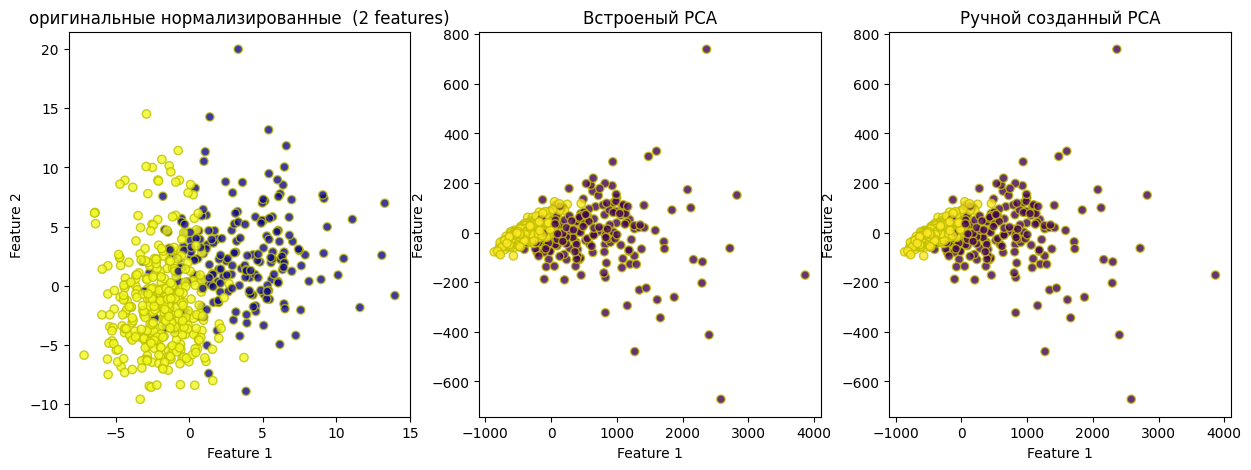

In [132]:
from sklearn.decomposition import PCA


pca_sklearn = PCA(n_components=2)
reduced_data_PCA=pca_sklearn.fit_transform(data_normal)

plt.figure(figsize=(15, 5))

    # Исходные данные
plt.subplot(131)
plt.scatter(data_normal[:, 0], data_normal[:, 1], c=data_target, cmap='plasma', edgecolors='y', alpha=0.8)
plt.title('оригинальные нормализированные  (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(132)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('Встроеный PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

reduced_data=pca_custom(data_normal,2)
plt.subplot(133)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('Ручной созданный PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')


## 5. Сравнить результаты, используя 2, 3, 4 главных компоненты

##### N=2

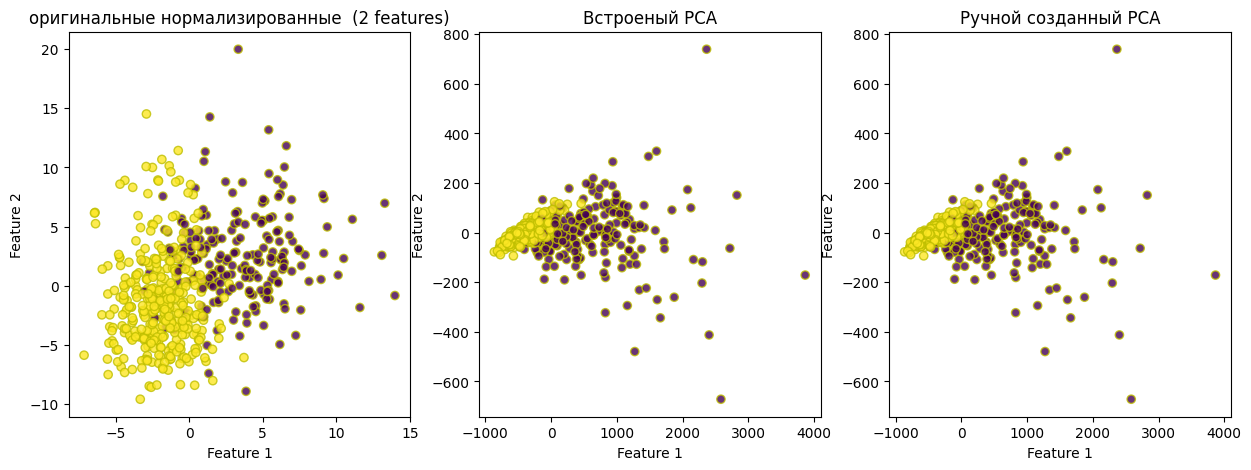

In [133]:
pca_sklearn = PCA(n_components=2)
reduced_data_PCA=pca_sklearn.fit_transform(data_normal)

plt.figure(figsize=(15, 5))

    # Исходные данные
plt.subplot(131)
plt.scatter(data_normal[:, 0], data_normal[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('оригинальные нормализированные  (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(132)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('Встроеный PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

reduced_data=pca_custom(data_normal,2)
plt.subplot(133)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('Ручной созданный PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


##### N=3

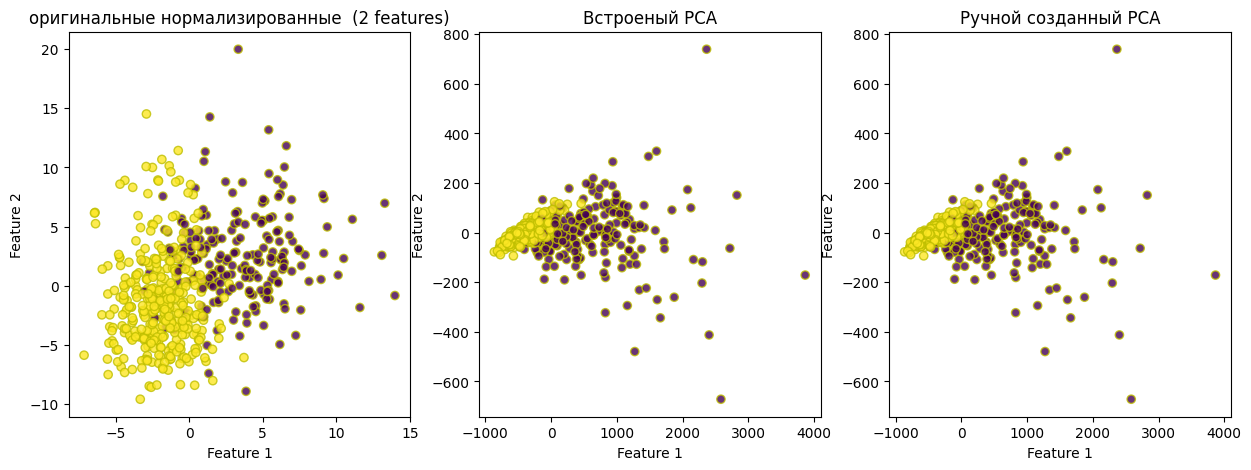

In [134]:
pca_sklearn = PCA(n_components=3)
reduced_data_PCA=pca_sklearn.fit_transform(data_normal)

plt.figure(figsize=(15, 5))

    # Исходные данные
plt.subplot(131)
plt.scatter(data_normal[:, 0], data_normal[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('оригинальные нормализированные  (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(132)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('Встроеный PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

reduced_data=pca_custom(data_normal,3)
plt.subplot(133)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('Ручной созданный PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

##### N=4

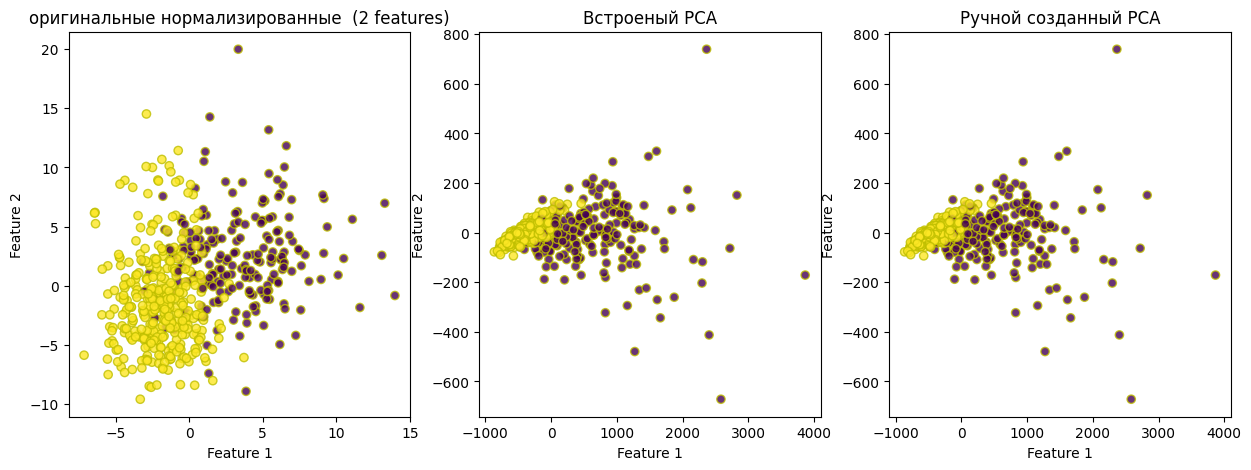

In [136]:
pca_sklearn = PCA(n_components=4)
reduced_data_PCA=pca_sklearn.fit_transform(data_normal)

plt.figure(figsize=(15, 5))

    # Исходные данные
plt.subplot(131)
plt.scatter(data_normal[:, 0], data_normal[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('оригинальные нормализированные  (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(132)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('Встроеный PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

reduced_data=pca_custom(data_normal,4)
plt.subplot(133)
plt.scatter(reduced_data_PCA[:, 0], reduced_data_PCA[:, 1], c=data_target, cmap='viridis', edgecolors='y', alpha=0.8)
plt.title('Ручной созданный PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()